In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import time
import torch
import numpy as np
from tqdm import tqdm

from datetime import datetime

In [ ]:
from CVUSA_dataset import CVUSA_dataset_cropped, CVUSA_Dataset_Eval
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset




transform = transforms.Compose([
    # transforms.Resize((224, 224)),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
])


# data_path = '/media/fahimul/2B721C03261BDC8D/Research/datasets/CVUSA' #don't include the / at the end
# data_path = '/home/fa947945/datasets/CVUSA_Cropped/CVUSA' #don't include the / at the end
data_path = '/data/Research/Dataset/CVUSA_Cropped/CVUSA' #don't include the / at the end

train_data= pd.read_csv(f'{data_path}/splits/train-19zl.csv')
train_ds = CVUSA_dataset_cropped(df = train_data, path=data_path, transform=transform)

anchor_img, positive_img, negative_img = train_ds[0]

anchor_img = anchor_img.permute(1, 2, 0)
positive_img = positive_img.permute(1, 2, 0)
negative_img = negative_img.permute(1, 2, 0)

# plt.imshow(anchor_img.numpy())

# plt.imshow(positive_img.numpy())


# train_loader = DataLoader(train_ds, batch_size=32, shuffle=False)




plt.subplot(1, 3, 1)
plt.imshow(anchor_img)
plt.title('anchor_img')
plt.axis('off')

# Plotting the second image
plt.subplot(1, 3, 2)
plt.imshow(positive_img)
plt.title('positive_img')
plt.axis('off')

# Plotting the third image
# plt.subplot(1, 3, 3)
# plt.imshow(negative_img)
# plt.title('negative_img')
# plt.axis('off')

plt.show()


In [ ]:
a = torch.rand(1, 128, 96, 96)
b = torch.rand(1, 128, 96, 96)
# b = torch.rand(1, 256, 48, 48)
c = torch.rand(1, 512, 24, 24)
d = torch.rand(1, 1024, 12, 12)

query_features = list([a,b])

reference_features = list([a,b,c,d])

for i in query_features:
    print(i.shape)

In [1]:
import torch
from torchvision.models import resnet50, ResNet50_Weights, vit_b_16, ViT_B_16_Weights
from torchsummary import summary
from models.clip_b32 import getClipModel
import torch.optim as optim
from losses import SoftTripletBiLoss
from custom_models import ResNet, VIT, CLIP_model


img1 = torch.rand(124, 3, 224, 224)
img2 = torch.rand(124, 3, 224, 224)



# from resnet_model import ResNet

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"Device: {device}")
# model = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)

# model1 = CLIP_model(embed_dim=1000)
model = ResNet()

em1, em2 = model(q = img1, r = img2, isTrain = True, isQuery = True)

em1

# para1 = list(filter(lambda p: p.requires_grad, model1.parameters()))
# para2 = list(filter(lambda p: p.requires_grad, model1.parameters()))
# para = para1.append(para2)
# opti = optim.SGD(para, lr=0.001)
# emb1 = model1.encode_image(img1)
# emb2 = model2.encode_image(img2)
# for param in model1.parameters():
#     param.requires_grad = False







# print(model2)





/home/fahimul/.conda/envs/CVGL/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/fahimul/.conda/envs/CVGL/lib/python3.11/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


tensor([[-1.0350, -1.8785, -1.5552,  ...,  0.0791,  3.4754, -0.9898],
        [-0.8629, -1.2342,  0.6087,  ...,  1.1347,  5.3220, -0.6197],
        [-0.2091, -0.2019, -1.9544,  ..., -0.5272,  0.8226,  0.2018],
        ...,
        [ 2.0658, -1.8601, -1.5172,  ...,  0.0546, -0.8059,  0.2552],
        [ 1.4264, -0.5258, -0.9697,  ...,  0.1152,  2.5933,  0.6167],
        [ 0.0105, -0.1749, -1.6366,  ..., -0.4713,  1.6532,  1.4841]],
       grad_fn=<AddmmBackward0>)

In [ ]:
from PIL import Image
import torch
from transformers import CLIPProcessor, CLIPVisionModel
from CVUSA_dataset import CVUSA_dataset_cropped, CVUSA_Dataset_Eval
from torch.utils.data import DataLoader
import pandas as pd
from torchvision import transforms
from tqdm import tqdm
from custom_models import CLIP_model
from eval import predict, accuracy

device = "cuda" if torch.cuda.is_available() else "cpu"

# model = CLIPVisionModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
model = CLIP_model()
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# url = "/data/Research/Dataset/CVUSA_Cropped/CVUSA/streetview/panos/0000001.jpg"
# image = Image.open(url).convert('RGB')
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

data_path = '/data/Research/Dataset/CVUSA_Cropped/CVUSA' #don't include the / at the end
train_data= pd.read_csv(f'{data_path}/splits/train-19zl.csv')
train_ds = CVUSA_dataset_cropped(df = train_data, path=data_path, transform=transform)
val_que = CVUSA_Dataset_Eval(data_folder=data_path, split='train', img_type='query', transforms=transform)
val_ref = CVUSA_Dataset_Eval(data_folder=data_path, split='train', img_type='reference', transforms=transform)

train_load = DataLoader(train_ds, batch_size=32, shuffle=False)
val_loader_que = DataLoader(val_que, batch_size=32, shuffle=False)
val_loader_ref = DataLoader(val_ref, batch_size=32, shuffle=False)

def get_vision_embeddings(img):
    # Preprocess the images
    img = img.to(device)
    temp_dic = {'pixel_values':img}
    # Use the CLIP model to get vision embeddings
    with torch.no_grad():
        outputs = model(**temp_dic)
        last_hidden_state = outputs.last_hidden_state
        pooled_output = outputs.pooler_output  # pooled CLS states
    return pooled_output


# img_features_list = []
# for idx, (img, label ) in enumerate(tqdm(val_loader_que)):
#     anchor_embedding = get_vision_embeddings(img)

#     img_features_list.append(anchor_embedding)
#     # print(anchor_embedding.shape)
# img_features = torch.cat(img_features_list, dim=0) 
# print(img_features.shape)

# for idx, (anchor, positive, negative) in enumerate(tqdm(train_load)):
#     anchor_embedding = get_vision_embeddings(anchor)
#     positive_embedding = get_vision_embeddings(positive)
#     print(anchor_embedding.shape)
#     print(positive_embedding.shape)

# print(anchor_embedding)

print("\nExtract Features:")
query_features, query_labels = predict(model=model, dataloader=val_loader_que, dev=device, isQuery=True)
reference_features, reference_labels = predict(model = model, dataloader=val_loader_ref, dev=device, isQuery=False) 



# print(query_features)


r1 =  accuracy(query_features=query_features, reference_features=reference_features, query_labels=query_labels, topk=[1, 5, 10])
    

In [2]:
from attributes import Configuration

config = Configuration()

config.epochs



50

In [ ]:
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPVisionModel
import torch

model = CLIPVisionModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(images=image, return_tensors="pt")
# input = torch.rand(32, 3, 224, 224)
# input = {'pixel_values':input}
# input

outputs = model(**inputs)
last_hidden_state = outputs.last_hidden_state
pooled_output = outputs.pooler_output  # pooled CLS states

inputs = inputs.pixel_values
inputs = torch.squeeze(inputs)
inputs.shape

In [13]:
from transformers import tokenization_utils_base
import torch
from eval import predict, accuracy
import numpy as np

input = torch.rand(32, 3, 224, 224)

temp_queue = torch.randn(5, 8)
temp_ref = torch.randn(10659, 256)

# ranking = np.sum((similarity[i,:]>similarity[i,i])*1.)

# query_features_norm = np.sqrt(np.sum((temp_queue**2).numpy(), axis=1, keepdims=True))

# similarity = torch.randn(10, 10).numpy()
# for i in range(10):
#     ranking = np.sum((similarity[i,:]>similarity[i,i])*1.)


temp_queue.to(torch.float16)
temp_queue

tensor([[-1.7380,  1.0044,  1.4699,  0.7485, -1.3624,  0.1314, -0.0520, -1.3359],
        [ 0.2570, -1.8800,  0.9309, -1.3954,  0.9043, -0.4051, -1.6659, -1.6334],
        [ 0.5951, -0.8952,  0.7633, -0.8561, -1.2480,  0.8736,  0.6420, -0.7921],
        [-0.1876, -0.2989,  0.8147, -0.5848,  1.5812, -0.2253, -0.3696, -0.9352],
        [-0.1061,  0.3593,  0.2452,  0.2625, -2.7823, -1.5755, -0.7128,  2.0801]])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision.models import vision_transformer
from torchvision.models import resnet50, ResNet50_Weights, vit_b_16, ViT_B_16_Weights


# Load pre-trained ViT model
pretrained_vit = model = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)


# Freeze the parameters of the pre-trained ViT model
for param in pretrained_vit.parameters():
    param.requires_grad = False

# Define the number of output classes
num_classes = 10  # CIFAR-10 has 10 classes

# Define a custom classifier with an extra hidden layer
class CustomClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CustomClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Extract the input size of the pre-trained ViT model
# input_size = pretrained_vit.head.in_features

# Define the size of the hidden layer
# hidden_size = 512

# Create an instance of the custom classifier
# classifier = CustomClassifier(input_size, hidden_size, num_classes)

# Combine the pre-trained ViT model with the custom classifier
# model = nn.Sequential(pretrained_vit, classifier)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define transformations for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match ViT input size
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

print(model)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:    # Print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')


In [ ]:
import math

dt = datetime.now()
f"{math.floor(dt.timestamp())}"[4:]

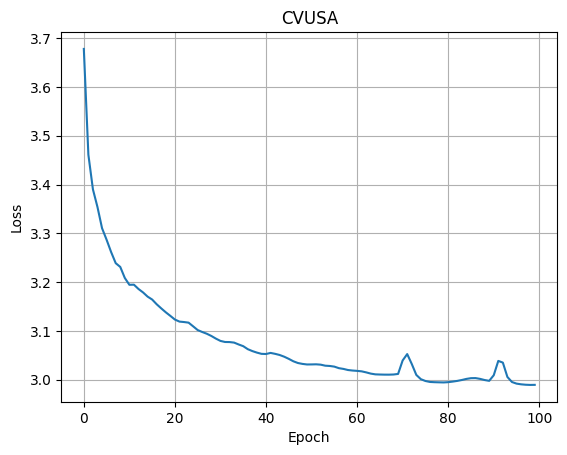

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/data/Research/CVGL_Baseline/losses/losses_6257958.csv')

# Assuming the first column is x-axis and the second column is y-axis
x = df.iloc[:, 0]
y = df.iloc[:, 1]

# Plotting
plt.plot(x, y)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CVUSA' )
plt.grid(True)
plt.show()


In [ ]:
a = torch.rand(128, 1000)
b = torch.rand(128, 1000)


# a_norm = np.sqrt(np.sum(a**2, axis=1, keepdims=True))

a_norm = np.sqrt(np.sum((a**2).numpy(), axis=1, keepdims=True))
b_norm = np.sqrt(np.sum((b**2).numpy(), axis=1, keepdims=True))

sim = np.matmul(a/a_norm, (b/b_norm).T)

eyes_ = torch.eye(5).cuda()
print(eyes_)
pos_mask = eyes_.eq(0.5)
pos_mask

In [ ]:
import torch
import clip
n=5
m=10
inputs_q = torch.randn(n,m).cuda()
inputs_k = torch.randn(n,m).cuda()



n = inputs_q.size(0)

normalized_inputs_q = inputs_q / torch.norm(inputs_q, dim=1, keepdim=True)
normalized_inputs_k = inputs_k / torch.norm(inputs_k, dim=1, keepdim=True)
# normalized_inputs_q = inputs_q
# normalized_inputs_k = inputs_k
# print(normalized_inputs_q)
# print(normalized_inputs_k)


# # Compute similarity matrix
# sim_mat = torch.matmul(normalized_inputs_q, normalized_inputs_k.t())

# print(sim_mat)

sim_mat = normalized_inputs_q @ normalized_inputs_k.T

print(sim_mat)

# split the positive and negative pairs
eyes_ = torch.eye(n).cuda()

pos_mask = eyes_.eq(1)
neg_mask = ~pos_mask


pos_sim = torch.masked_select(sim_mat, pos_mask)
neg_sim = torch.masked_select(sim_mat, neg_mask)

# Contrastive loss of the example values
# temp parameter
t = 0.07
# concatenated vector divided by the temp parameter
for i in range(n):
    row = sim_mat[i]/t
    pos = row[i]

    exp = torch.exp(row)

    loss = -torch.log(pos/torch.sum(exp))
    print(loss)
    # #e^x of the values
    # exp = np.exp(logits)
    # # we only need to take the log of the positive value over the sum of exp. 
    # loss = - np.log(exp[0]/np.sum(exp))






# loss_batch = torch.log(1 + torch.exp((neg_sim_ - pos_sim_) * self.alpha))
# if torch.isnan(loss_batch).any():
#     print(inputs_q, inputs_k)
#     raise Exception

# loss = loss_batch.mean()

# mean_pos_sim = pos_sim.mean().item()
# mean_neg_sim = neg_sim.mean().item()
# loss, mean_pos_sim, mean_neg_sim


In [ ]:
triplet_loss = nn.TripletMarginLoss(margin=1.0, p=2, eps=1e-7)
anchor = torch.randn(100, 128, requires_grad=True)
positive = torch.randn(100, 128, requires_grad=True)
negative = torch.randn(100, 128, requires_grad=True)
output = triplet_loss(anchor, positive, negative)
output.backward()

In [4]:
import torch
import clip
from PIL import Image
from models.clip_b32 import getClipModel


device = "cuda" if torch.cuda.is_available() else "cpu"
model = getClipModel()
model

# image = preprocess(Image.open("CLIP.jpg")).unsqueeze(0).to(device)
# for i in range(5):
#     image = torch.rand(64, 3, 224, 224)
#     image = preprocess(image).unsqueeze(0).to(device)
#     # text = clip.tokenize(["a diagram", "a dog", "a stallion"]).to(device)

#     with torch.no_grad():
#         image_features = model.encode_image(image)
#         fet.append(image)
        # text_features = model.encode_text(text)
    
#     logits_per_image, logits_per_text = model(image, text)
#     probs = logits_per_image.softmax(dim=-1).cpu().numpy()

# print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]


CLIPVisionModelWithProjection(
  (vision_model): CLIPVisionTransformer(
    (embeddings): CLIPVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
      (position_embedding): Embedding(50, 768)
    )
    (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=

In [25]:
import torch 

model_st = torch.load('model_weights/model_st.pth')
model_eval = torch.load('model_weights/model_eval.pth')
model_tr = torch.load('model_weights/model_tr.pth')



for param in model_st.parameters():
  print(param.data)






tensor([ 2.0591e-03,  7.9107e-04, -7.4747e-03, -7.6637e-03, -6.3171e-03,
        -2.6693e-03,  1.2999e-02, -5.1659e-03,  6.9023e-01, -7.2976e-03,
        -1.3655e-01, -5.9287e-03,  5.6975e-03, -2.6576e-02, -4.3486e-03,
        -4.8830e-03,  2.2827e-02, -4.2716e-03, -1.9288e-02, -4.0855e-04,
         1.0054e-02, -1.1419e-03,  7.7314e-03,  4.0492e-03, -6.9799e-04,
        -5.7392e-03,  8.7129e-02,  1.7433e-02, -9.4172e-03, -9.6271e-04,
         6.1759e-04, -1.4820e-02, -1.0836e-01,  1.5677e-01, -1.3539e-02,
         1.8349e-02,  8.0158e-03, -4.5944e-03, -4.4241e-03, -2.3373e-03,
        -4.8460e-03,  6.7645e-03, -2.5592e-03, -3.6439e-01,  3.3991e-04,
         4.5819e-03, -1.2367e-02, -2.2806e-02,  3.0317e-02, -1.3982e-02,
        -1.7476e-03, -5.6374e-03, -6.2420e-03, -1.2713e-02,  7.6120e-01,
        -3.8084e-03,  5.0419e-01,  1.9952e-02, -9.9109e-03, -1.3272e-02,
        -2.4869e-02, -6.6259e-03,  8.0957e-03, -1.1232e-03, -9.0377e-03,
        -4.7198e-03, -3.4812e-03, -8.4083e-03, -2.7

In [28]:
for param in model_tr.parameters():
  print(param.data)

tensor([-1.2010e-02,  4.0859e-02,  1.4803e-02, -4.4291e-02, -4.6268e-02,
         3.1150e-02, -2.7443e-02, -4.4539e-02,  6.5078e-01,  3.0482e-02,
        -1.1572e-01,  3.1266e-02, -3.2857e-02, -6.4155e-02, -4.2072e-02,
        -2.4928e-02,  6.3771e-02, -4.4309e-02, -6.1660e-03,  1.4292e-02,
        -2.8685e-02,  1.6473e-02, -7.2364e-03,  2.0339e-02,  3.5957e-02,
        -2.4702e-02,  1.2311e-01,  5.7079e-02,  3.0144e-02, -1.8563e-02,
        -1.8156e-02,  2.3690e-02, -1.1979e-01,  1.9903e-01, -2.8586e-02,
         3.0417e-02, -3.0095e-02, -3.7842e-02,  9.4183e-03, -1.6996e-02,
        -4.2953e-02,  7.0675e-03, -4.5042e-02, -4.0225e-01,  1.7009e-02,
         4.5186e-02, -2.6712e-02,  1.5667e-02,  1.5560e-02,  3.3339e-02,
         1.6516e-02, -4.3965e-02,  3.0808e-02, -4.9550e-02,  7.2196e-01,
        -1.4558e-02,  4.6445e-01,  5.1979e-02,  2.8246e-03,  2.4751e-02,
        -6.3873e-02, -4.5395e-02, -3.0155e-02, -3.9316e-02,  4.2103e-03,
         9.2943e-03, -4.4361e-02, -2.3551e-02,  1.0

In [19]:
# torch.cuda.device_count() 
import torch
for i in range(torch.cuda.device_count()):
   print(torch.cuda.get_device_properties(i).name)

NVIDIA RTX A6000
NVIDIA RTX A6000
